# librarys

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import plotly.express as px 
%matplotlib inline

# data

In [3]:
data = pd.read_csv('boston_house_prices.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

# data engenering

In [4]:
data.shape

(506, 14)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
data['AGE'] = data['AGE'].astype(int)

# data vizualization

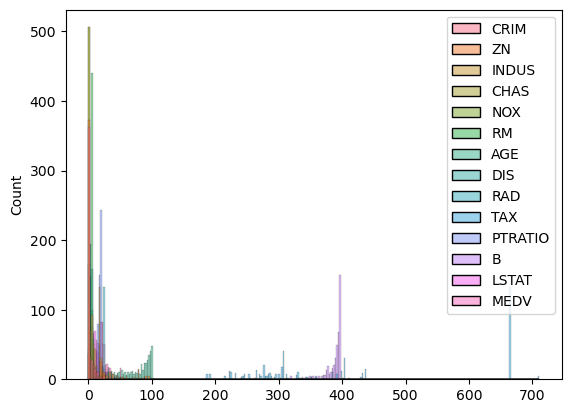

In [7]:
sns.histplot(data=data)
plt.show()

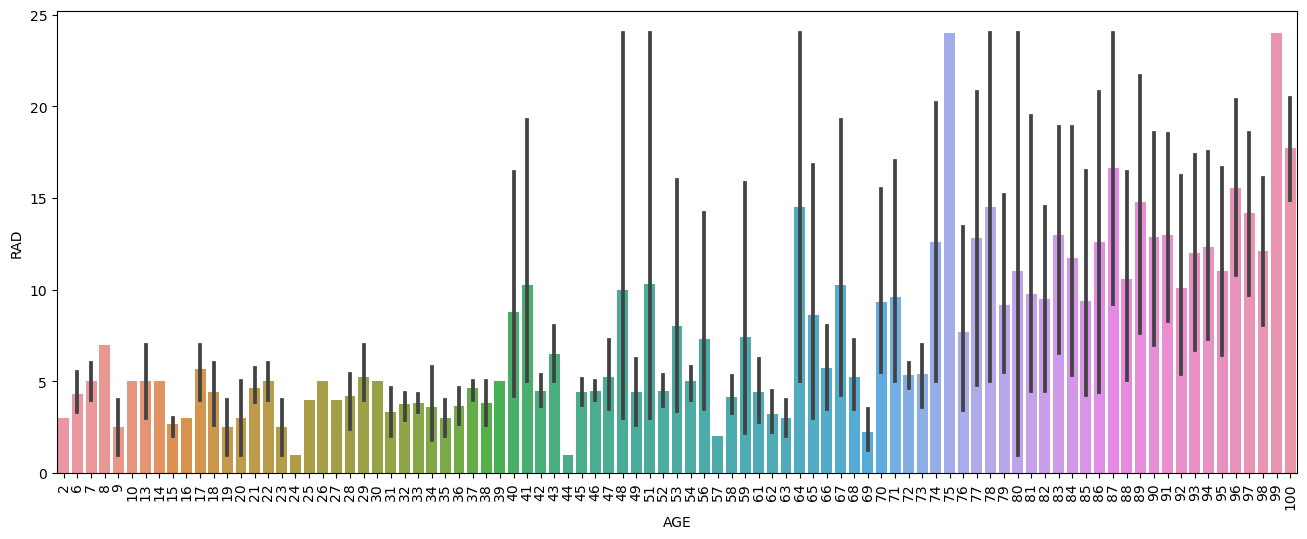

In [54]:
plt.figure(figsize=(16,6))# qoshimcha kod
sns.barplot(x=data['AGE'],y=data['RAD'])
plt.xticks(rotation=90)
plt.show()

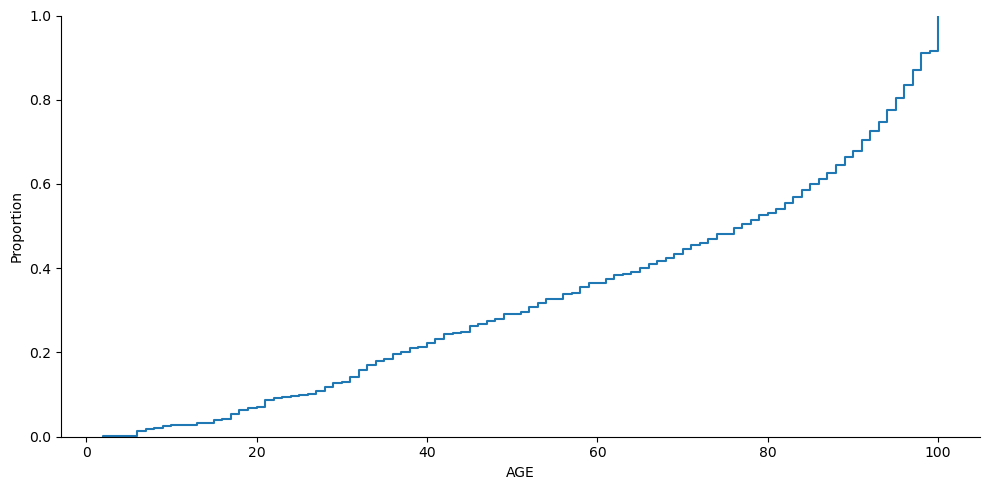

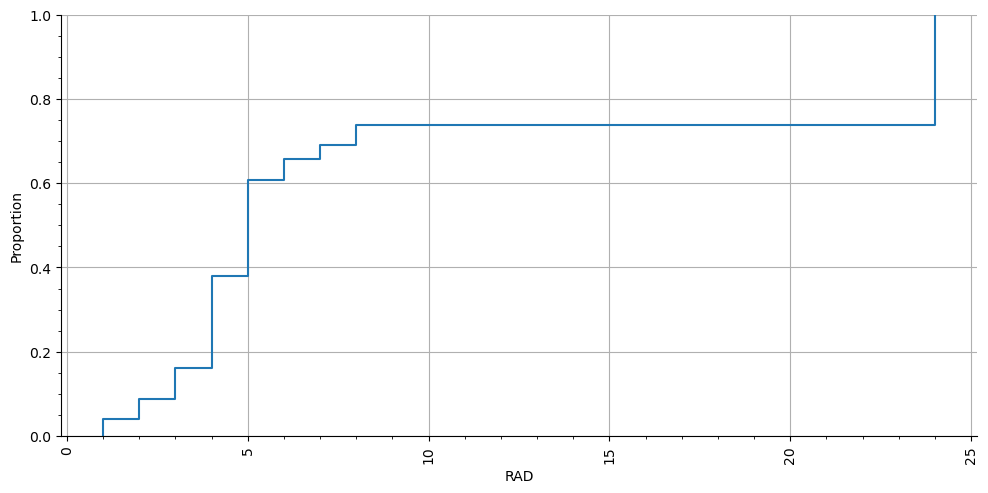

In [16]:
sns.displot(data=data, x='AGE', kind='ecdf', height=5, aspect=2)
sns.displot(data=data, x='RAD', kind='ecdf', height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid()
plt.minorticks_on()
plt.show()

<Axes: xlabel='TAX', ylabel='AGE'>

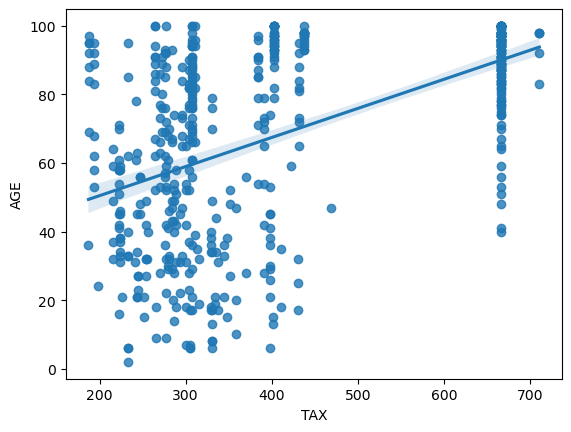

In [19]:
sns.regplot(data=data, x='TAX', y='AGE')

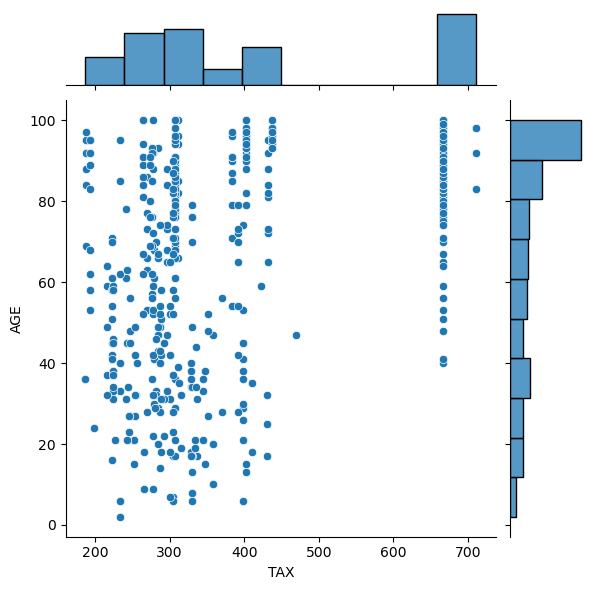

In [20]:
sns.jointplot(data=data, x='TAX', y='AGE')

In [21]:
corr_data = data.corr().abs()
corr_data.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.353722,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569667,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644672,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
CHAS,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086118,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731551,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
RM,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.241191,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
AGE,0.353722,0.569667,0.644672,0.086118,0.731551,0.241191,1.000000,0.747648,0.456475,0.506716,0.261051,0.273849,0.603038,0.377217
DIS,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747648,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
RAD,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456475,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
TAX,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506716,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536


# train test split 

In [22]:
from sklearn.model_selection import train_test_split 

In [24]:
x = data.drop('CHAS', axis=1)
y = data['CHAS']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

# Ml create

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn_algorithms = KNeighborsClassifier(n_neighbors=8)

In [43]:
knn_algorithms.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
y_predict = knn_algorithms.predict(x_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        96
           1       0.00      0.00      0.00         6

    accuracy                           0.94       102
   macro avg       0.47      0.50      0.48       102
weighted avg       0.89      0.94      0.91       102



/Users/azamatergashev/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/azamatergashev/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/azamatergashev/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [40]:
from sklearn.model_selection import GridSearchCV

param_gr = {'n_neighbors': np.arange(1,10)}
knn = GridSearchCV(knn_algorithms,param_gr, cv=5)
knn.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [41]:
knn.best_params_

{'n_neighbors': 8}

In [46]:
x = data.drop('CRIM', axis=1)
y = data['CRIM']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [51]:
y_predict = knn_reg.predict(x_test)

In [53]:
pd.DataFrame([y_predict])

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.113276,0.037696,10.199068,5.577468,0.55594,0.635076,0.020704,0.18467,0.068116,0.102464,...,1.829748,0.16218,0.091132,12.047126,0.099724,13.53033,0.089518,0.06299,0.151,0.054186
